In [31]:
%matplotlib inline

In [32]:
from sourmash import fig
import scipy.cluster.hierarchy as sch

In [33]:
!sourmash compare {{1,2,5}}.fa.gz.sig -o 1-2-5.cmp
!sourmash compare {{1,2,3,4,5}}.fa.gz.sig -o 1-2-3-4-5.cmp


== This is sourmash version 3.2.1.dev7+g5d096233. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loaded 3 signatures total.                                                     

0-1.fa.gz           	[1.   0.   0.35]
1-2.fa.gz           	[0. 1. 0.]
2-5.fa.gz           	[0.35 0.   1.  ]
min similarity in matrix: 0.000
saving labels to: 1-2-5.cmp.labels.txt
saving distance matrix to: 1-2-5.cmp

== This is sourmash version 3.2.1.dev7+g5d096233. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loaded 5 signatures total.                                                     

0-1.fa.gz           	[1.   0.   0.   0.   0.35]
1-2.fa.gz           	[0.    1.    0.03  0.048 0.   ]
2-3.fa.gz           	[0.   0.03 1.   0.39 0.  ]
3-4.fa.gz           	[0.    0.048 0.39  1.    0.   ]
4-5.fa.gz           	[0.35 0.   0.   0.   1.  ]
min similarity in matrix: 0.000
saving labels to: 1-2-3-4-5.cmp.labels.txt
saving distance matrix to: 1-2-3-4-5.cmp


## 1-2-5

In [34]:
D, labeltext = fig.load_matrix_and_labels('1-2-5.cmp')
D

array([[1.  , 0.  , 0.35],
       [0.  , 1.  , 0.  ],
       [0.35, 0.  , 1.  ]])

In [35]:
Y = sch.linkage(D, method='single')
Y

array([[0.        , 2.        , 0.91923882, 2.        ],
       [1.        , 3.        , 1.45688023, 3.        ]])

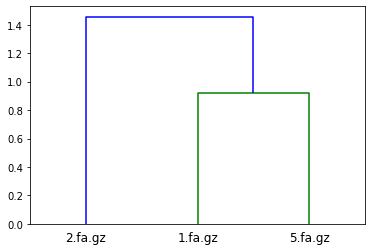

In [55]:
Z = sch.dendrogram(Y, orientation='top', labels=labeltext)

In [38]:
Z['ivl']

['2.fa.gz', '1.fa.gz', '5.fa.gz']

In [52]:
rootnode, nodelist = sch.to_tree(Y, True)
for node, _ in zip(nodelist, range(3)):
    print(node.get_id())

0
1
2


## 1-2-3-4-5

In [39]:
D2, labeltext2 = fig.load_matrix_and_labels('1-2-3-4-5.cmp')
D2

array([[1.   , 0.   , 0.   , 0.   , 0.35 ],
       [0.   , 1.   , 0.03 , 0.048, 0.   ],
       [0.   , 0.03 , 1.   , 0.39 , 0.   ],
       [0.   , 0.048, 0.39 , 1.   , 0.   ],
       [0.35 , 0.   , 0.   , 0.   , 1.   ]])

In [40]:
Y2 = sch.linkage(D2, method='single')
Y2

array([[2.        , 3.        , 0.86285804, 2.        ],
       [0.        , 4.        , 0.91923882, 2.        ],
       [1.        , 5.        , 1.39363123, 3.        ],
       [6.        , 7.        , 1.45797942, 5.        ]])

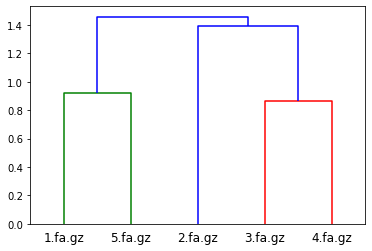

In [54]:
Z2 = sch.dendrogram(Y2, orientation='top', labels=labeltext2)

In [57]:
Z2['ivl']

['1.fa.gz', '5.fa.gz', '2.fa.gz', '3.fa.gz', '4.fa.gz']

In [62]:
rootnode2, nodelist2 = sch.to_tree(Y2, True)
    
for node in nodelist2:
    if node.is_leaf():
        print('obs:', node.get_id())
    else:
        l_id = node.get_left().get_id()
        r_id = node.get_right().get_id()
        print('cluster', node.get_id(), node.get_left().get_id(), node.get_right().get_id())
        if l_id < len(labeltext2):
            print('** left:', labeltext2[l_id])
        if r_id < len(labeltext2):
            print('** right:', labeltext2[r_id])


obs: 0
obs: 1
obs: 2
obs: 3
obs: 4
cluster 5 2 3
** left: 3.fa.gz
** right: 4.fa.gz
cluster 6 0 4
** left: 1.fa.gz
** right: 5.fa.gz
cluster 7 1 5
** left: 2.fa.gz
cluster 8 6 7


Conclusion: the IDs in the linkage matrix are indeed indices into the original observations.